In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('data_preprocessed.csv')

In [3]:
df = df.dropna()

In [4]:
# Vectorization
tfidf_vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    max_features=5000
)

X = tfidf_vectorizer.fit_transform(df['article'])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['category'])

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# train model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [7]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


                precision    recall  f1-score   support

      BUSINESS       0.76      0.43      0.55      1490
        COMEDY       0.74      0.25      0.38      1083
 ENTERTAINMENT       0.70      0.76      0.73      3509
  FOOD & DRINK       0.79      0.74      0.76      1686
     PARENTING       0.77      0.66      0.71      2549
      POLITICS       0.79      0.92      0.85      7128
        SPORTS       0.84      0.47      0.60      1009
STYLE & BEAUTY       0.83      0.76      0.79      2414
        TRAVEL       0.80      0.74      0.77      2002
      WELLNESS       0.69      0.85      0.77      4925

      accuracy                           0.76     27795
     macro avg       0.77      0.66      0.69     27795
  weighted avg       0.76      0.76      0.75     27795



In [8]:
# Example Prediction
def predict_category(text):
    text_vector = tfidf_vectorizer.transform([text])
    predicted_category_index = model.predict(text_vector)[0]
    return label_encoder.classes_[predicted_category_index]

sample_text = "of the funniest tweets about cats and dogs this week sept until you have a dog you dont understand what could be eaten"
print(predict_category(sample_text))

COMEDY


In [10]:
#Evaluation
import sklearn.metrics
accuracy_score = sklearn.metrics.accuracy_score(y_test, y_pred)
print("accuracy_score of test set:", accuracy_score)

accuracy_score of test set: 0.7585536967080411


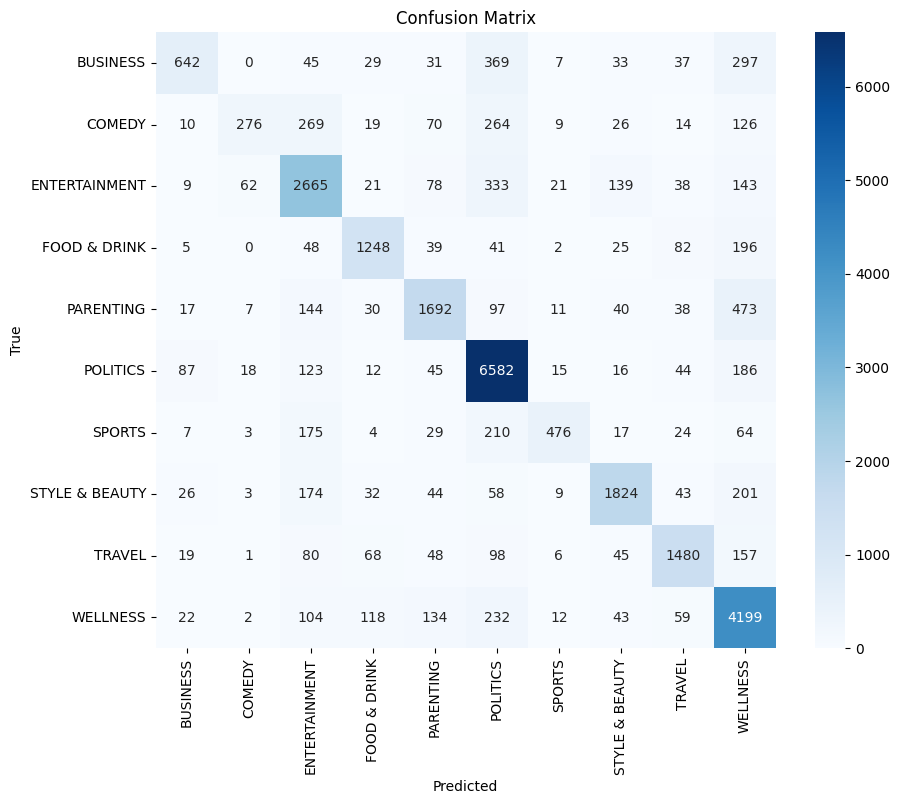

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()